# A company has launched the product, people are using it and giving comments. Company want to know the sentiment  status of comments/review about Positive , Negative or Neutral.

In [1]:
import pandas as pd
import numpy as np
import nltk # natual language toolkit

In [2]:
#vader it is pretrained for sentiment analysis

In [3]:
import nltk

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent=SentimentIntensityAnalyzer() #object

In [6]:
#compund would from-1 to  +1
#  where - indicates -ve sentiment and + ve indicates +ve sentiment

In [7]:
ta= pd.read_csv(r"F:\Imaticus\Data set\AmazonFoodReviews.csv")


In [8]:
ta.shape

(568454, 10)

In [9]:
ta.head() 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
ta.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [11]:
ta = ta.loc[:, ['Text']]


In [12]:
ta.head() 

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


# Sentiment Analysis

In [13]:
sentiment=[] #empty list
for comment in ta['Text']:
    var1=sent.polarity_scores(comment)  #storing in var1
    sentiment.append(var1['compound'])

In [14]:
ta['sentiment']=sentiment

In [15]:
ta.shape

(568454, 2)

In [16]:
len(sentiment)

568454

In [17]:
ta.head()

,Text,sentiment
0,I have bought several of the Vitality canned d...,0.9441
1,Product arrived labeled as Jumbo Salted Peanut...,-0.5664
2,This is a confection that has been around a fe...,0.8265
3,If you are looking for the secret ingredient i...,0.0000
4,Great taffy at a great price. There was a wid...,0.9468


In [18]:
ta.sentiment.describe()

count    568454.000000
mean          0.647316
std           0.466244
min          -0.999400
25%           0.576400
50%           0.854600
75%           0.942100
max           0.999900
Name: sentiment, dtype: float64

In [19]:

ta.sentiment.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])


count    568454.000000
mean          0.647316
std           0.466244
min          -0.999400
10%          -0.101000
20%           0.440400
30%           0.669600
40%           0.788400
50%           0.854600
60%           0.897900
70%           0.928700
80%           0.953800
90%           0.974800
100%          0.999900
max           0.999900
Name: sentiment, dtype: float64

In [20]:
ta[ta.sentiment<0].shape

(61404, 2)

In [21]:
ta[ta.sentiment>0].shape

(499075, 2)

In [22]:
analysis = [] # make a new empty list 
i=0
for i in range(len(ta.sentiment)):
    if ta['sentiment'][i] < 0:
        analysis.append('Negative')
    elif ta['sentiment'][i] > 0:
        analysis.append('Positive')

    else:
        analysis.append('Neuteral')

ta['SentimentAnalysis'] = analysis

In [24]:
ta = ta.loc[:, ['Text','SentimentAnalysis']]


In [25]:
ta.head()

,Text,SentimentAnalysis
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Positive
3,If you are looking for the secret ingredient i...,Neuteral
4,Great taffy at a great price. There was a wid...,Positive


In [26]:
ta['SentimentAnalysis'].value_counts()

Positive    499075
Negative     61404
Neuteral      7975
Name: SentimentAnalysis, dtype: int64

In [27]:
ta['SentimentAnalysis'].replace({'Positive':2 , 'Negative':1 , 'Neuteral':0} , inplace= True)


In [28]:
from nltk.corpus import stopwords
abcd = stopwords.words('english')

In [29]:
import string

In [30]:
xyz=string.punctuation

In [31]:
def text_process(mess):            ### creating a function
    """                                                        ## a docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in xyz]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in abcd]

In [32]:
ta.Text=ta.Text.str.lower()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# TDM - I need count of each & every word
# CountVectorizer used to get count of each unique word
# count is needed after removing punctuation & stopwords

In [34]:
import time

start = time.time() # Get the current time

bow_transformer =    CountVectorizer(analyzer = text_process   ).fit(ta.Text)

end = time.time() # get the current time
print(end - start)

400.6111686229706


In [35]:
len(bow_transformer.vocabulary_)


240626

In [36]:
tdm = bow_transformer.transform(ta["Text"])

In [37]:
tdm.shape

(568454, 240626)

In [38]:
type(tdm) # SPARSE matrix

scipy.sparse.csr.csr_matrix

In [39]:
tdm1=tdm.copy()

In [87]:
tdm=tdm1

# Sampling

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split( tdm,ta['SentimentAnalysis'] ,test_size=.2)

In [93]:
print(x_train.shape)
print(y_train.shape)
print("----")
print(x_test.shape)
print(y_test.shape)

(454763, 240626)
(454763,)
----
(113691, 240626)
(113691,)


# Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nb_model = MultinomialNB()

In [48]:
nb_model.fit(x_train, y_train)

MultinomialNB()

In [49]:
pred = nb_model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
tab =  confusion_matrix(y_test , pred)

In [52]:
tab

array([[   61,   322,  1233],
       [    6,  5829,  6480],
       [   26,  4658, 95076]], dtype=int64)

In [53]:
tab.diagonal().sum() * 100 / tab.sum()

88.80738141101759

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.04      0.07      1616
           1       0.54      0.47      0.50     12315
           2       0.92      0.95      0.94     99760

    accuracy                           0.89    113691
   macro avg       0.71      0.49      0.50    113691
weighted avg       0.88      0.89      0.88    113691



In [ ]:
#Model is Not performaning well for class 1 , so checking for class imbalance problem.

# Class Imbalance

In [56]:
print("Before OverSampling, counts of label 'Positive': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label 'Negative': {} \n".format(sum(y_train  == 1)))
print("Before OverSampling, counts of label 'Neuteral': {} \n".format(sum(y_train  == 0)))


Before OverSampling, counts of label 'Positive': 399315
Before OverSampling, counts of label 'Negative': 49089 

Before OverSampling, counts of label 'Neuteral': 6359 



In [ ]:
#class imbalance problem exists.

# Oversampling using Smote

In [52]:
#pip install imblearn

In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

In [97]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)

In [98]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  

In [99]:
print("After OverSampling, counts of label 'Positive': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label 'Negative': {} \n".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label 'Neuteral': {} \n".format(sum(y_train_res == 0)))

After OverSampling, counts of label 'Positive': 399249
After OverSampling, counts of label 'Negative': 399249 

After OverSampling, counts of label 'Neuteral': 399249 



In [ ]:
#using smote class is balanced now.

# Naive Bayes after Smote

In [100]:
nb_model.fit(x_train_res, y_train_res)

MultinomialNB()

In [101]:
predn = nb_model.predict(x_test)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
tab1 =  confusion_matrix(y_test , predn)

In [104]:
tab1

array([[  684,   321,   578],
       [  119,  8143,  4020],
       [  605, 10170, 89051]], dtype=int64)

In [105]:
tab1.diagonal().sum() * 100 / tab1.sum()

86.09124732828457

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test,predn))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46      1583
           1       0.44      0.66      0.53     12282
           2       0.95      0.89      0.92     99826

    accuracy                           0.86    113691
   macro avg       0.62      0.66      0.63    113691
weighted avg       0.89      0.86      0.87    113691



# Model with smote giving good result

# plot a word cloud 

In [102]:
#  plot a word cloud 
# word cloud is pictorial representaion of the most frequent words 
# based on those words we can get the idea on which topic the document was


In [103]:
from wordcloud import WordCloud #required import

In [104]:
import matplotlib.pyplot as plt

In [105]:
ta['SentimentAnalysis'].value_counts()

2    499075
1     61404
0      7975
Name: SentimentAnalysis, dtype: int64

In [107]:
Negative_sentiment=ta[ta.SentimentAnalysis==1]
Positive_sentiment=ta[ta.SentimentAnalysis==2]

# Negative Sentiment word representation using cloud word

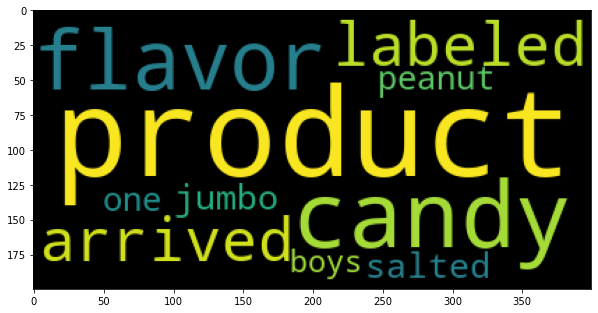

In [110]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 10).generate(str(Negative_sentiment["Text"]) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)

# Positive Sentiment word representation using cloud word

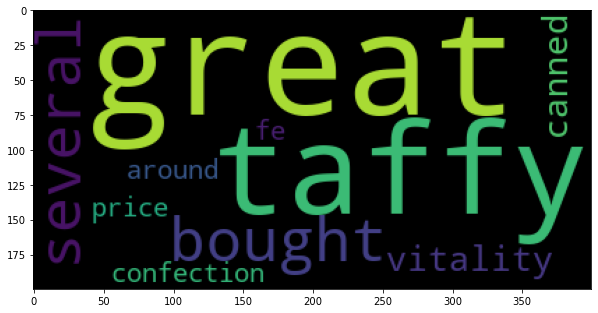

In [111]:
cloud  = WordCloud(stopwords = stopwords.words("english"), max_words= 10).generate(str(Positive_sentiment["Text"]) )
plt.figure(figsize=(10 , 10)) 
plt.imshow(cloud)